# Spacecraft telemetry and command

#### V. Hunter Adams (vha3), MAE 4160/5160, Spring 2020

In [18]:
from IPython.display import Latex
from IPython.display import Image
from IPython.core.display import HTML

## In these lectures:

1. The link budget equation
2. Modulations
3. Bit error rate
4. The Shannon Limit
5. Coding Techniques
6. Antennas

## Additional Reading

1. SMAD 16

## The Link Budget Equation

The goal of a link budget is to determine the *signal-to-noise ratio* of a transmitted signal. In the case of spacecraft, these are often radio signals, though they could also be optical signals. I want to construct this lecture and the next lecture by starting with an intuitive skeleton of the link budget equation, and then stepping through each term to fill in its associated details. Once we've arrived at the link budget equation, we'll use it to perform some other common analyses, like calculating bit error rate and channel capacity.

The most general expression for signal-to-noise ratio is, by definition, the received power of the signal divided by the power of the noise:

\begin{align}
SNR &= \frac{P_R}{P_N}
\end{align}

Depending on the units in which $P_R$ and $P_N$ are represented, you may see the variable $SNR$ given different neames. $\frac{E_b}{N_0}$ is a common one. We'll discuss all of these minor details throughout the coming two lectures, but the above expression summarizes our goal most generally. When link budgeting, we decide on some threshold signal-to-noise ratio which is acceptable, and then we design our telemetry and command system such that we achieve that threshold $SNR$.

Let's consider this equation piece by piece, adding resolution where necessary. We'll start with the numerator.

### Free-space transmission

Consider the numerator of the $SNR$ equation $SNR = \frac{P_R}{P_N}$. This represents the power of the *received* signal. That is to say, the power of the signal after it has been transmitted through an antenna, through space, and into another antenna. For the time being, we are assuming that there is no noise in the system. We are allowed to do this because all of those noise sources appear in the denominator, so we'll consider them separately.

**Question**: Before we even get started computing this quantity, what parameters do you *expect* will appear in the equation for the received power? An example of one such parameter is the distance of the transmission. What else will appear?

1. Transmit power.
1. Transmission distance.
2. TX antenna gain.
3. RX antenna gain.
4. Wavelength of carrier wave.
5. (Coming later) Coding gain.

Let's consider this systematically. Let us consider the case of two antennas (transmit and receive antennas) in free space separated by a distance $R$.

Let us assume that $P_T$ Watts of total power is delivered to the transmit antenna, which (for the moment) is assumed to be omnidirectional and lossless. Furthermore, we'll assume that the receive antenna is in the far field of the the transmit antenna (a safe assumption for transmissions from orbit). As the signal propagates spherically out from the transmit antenna, the power density (watts per square meter) of the plane wave decreases. By the time the signal reaches the receive antenna at a distance $d$ away, the power density is given by:

\begin{align}
p &= \frac{P_T}{4\pi d^2}
\end{align}

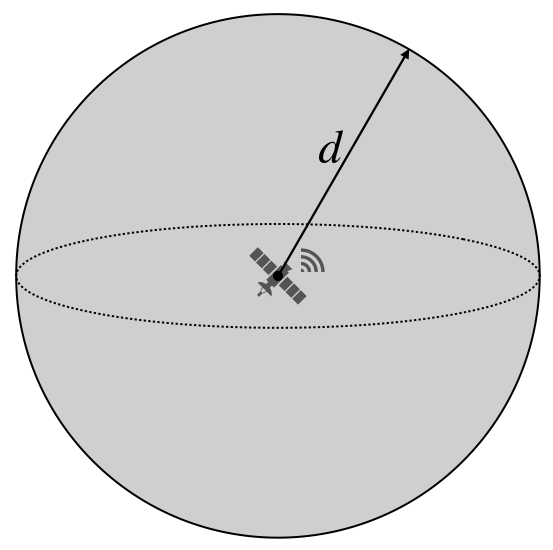

In [3]:
Image("freespace.png", width=400)

Any losses and directionality of the transmit antenna can be absorbed by a gain $G_T$. A transmit gain greater than one for a lossless antenna means that it is transmitting in a preferrred direction, and that direction is towards the receive antenna. A gain of 1 corresponds to an isotropic antenna. Augmenting the above equation:

\begin{align}
p &= \frac{P_T}{4\pi d^2} G_T
\end{align}

Now consider the receive antenna. The aperature (i.e. effective area or receiving cross section) of an antenna is a measure of how effective an antenna is at receiving the power of radio waves. It is the area, oriented perpendicular to the direction of an incoming radio wave, that would intercept the same amount of power from that wave as is produced by the antenna receiving it. We can therefore augment the equation again to get received power:

\begin{align}
P_R &= \frac{P_T}{4\pi d^2}G_T A_{ER}
\end{align}

The aperature for any antenna can also be expressed as:

\begin{align}
A_{ER} &= \frac{\lambda ^2}{4\pi}G_R
\end{align}

Rewriting again:

\begin{align}
P_R = \frac{P_TG_TG_R\lambda^2}{\left(4\pi d\right)^2}
\end{align}

The above expression has a name. It is the *Friis Transmission Formula.* This expression gives us the received power as a function of transmitted power, tx antenna gain, rx antenna gain, tx distance, and wavelength. In the above equation, power is measured in linear units (watts). If, however, we convert to logarithmic units (decibels), we get the following:

\begin{align}
10\text{log}_{10}P_R = 10\text{log}_{10}\left(\frac{P_TG_TG_R\lambda^2}{\left(4\pi d\right)^2}\right)
\end{align}

\begin{align}
[P_R]_{db} = [P_T]_{db} + [G_T]_{db} + [G_R]_{dB} + 10\text{log}_{10}\left[\left(\frac{\lambda}{4\pi R}\right)^{2}\right]
\end{align}

### Attenuation

Of course, the channel through which we are communicating is not lossless. There are various sources of *attenuation* which decrease the strength of the signal. The attenuation comes from the atmosphere and from losses within the transmit and receive hardware itself. Our expression for the losses will include:

1. Atmospheric losses
2. Circuit losses

#### The atmosphere

Transmission through the atmosphere attenuates the signal by some scale factor $L_a$. This will be some number between 0 and 1. We can augment our equation above for the received power to include attenuation from the atmosphere as shown below:

\begin{align}
P_R = \frac{P_TG_TG_RL_a\lambda^2}{\left(4\pi d\right)^2}
\end{align}

The amount of attentuation caused by the atmosphere depends on one's choice of frequency, as shown below.

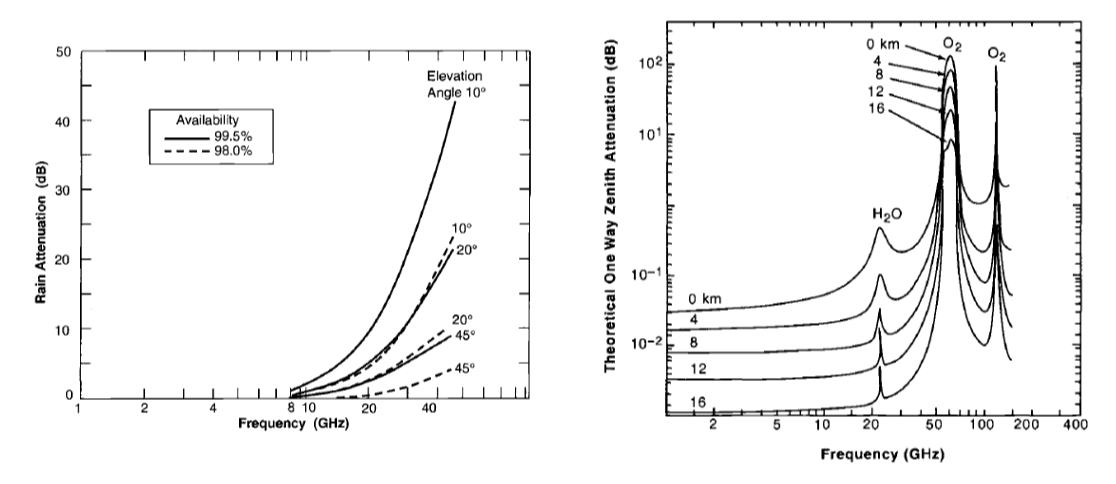

In [5]:
Image("att.png", width=800)

#### Circuit losses

Our signal will also be attenuated by our hardware (coaxial cables, connectors, etc.). Transmission through this hardware will attenuate the signal by some scale factor $L_l$. So, we can again augment our equation for the received power:

\begin{align}
P_R = \frac{P_TG_TG_RL_aL_l\lambda^2}{\left(4\pi d\right)^2} \text{ (Watts)}
\end{align}

### Changing units

The above expression gives us the received power (energy per unit time, i.e. J/s, i.e. Watts) at the Rx antenna, and includes information about the tx power, tx gain, rx gain, atmospheric attenuation, circuit attenuation, tx distance, and wavelength. For doing a link budget analysis, we would like to know the energy per unit *bit*. We want to know how much energy is contained within each bit, which we represent using the variable $E_b$ (for Energy per bit). To find $E_b$, we simply divide the received power by the bit rate (bits/sec):

\begin{align}
E_b &= \frac{P_R}{R_b}\\
&=  \frac{P_TG_TG_RL_aL_l\lambda^2}{\left(4\pi d\right)^2R_b} \text{ (Joules/bit)}
\end{align}

### Noise

 We want to *compare* the energy contribution from our signal (above) to the energy contribution from noise. We find the contribution from noise by calculating the noise spectral density, which is the noise power per unit of bandwidth. In our case, the majority of our noise contribution comes from *thermal noise*. The spectral noise density for thermal noise is calculated as shown below:

\begin{align}
N_0 &= \frac{P_N}{B} = K_B T_{sys}
\end{align}

Where $K_B$ is the Boltzmann Constant (units of Joules/Kelvin), and $T_{sys}$ is the system noise temperature (Kelvin). $P_N$ is the noise power (Watts) and $B$ is the bandwidth (Hz, bits/sec).

#### System noise temperature

The total input noise temperature on the system, $T_{sys}$, has contributions from the antenna and the receiver:

\begin{align}
T_{sys} &= T_A + T_{R}
\end{align}

The antenna noise temperature $T_A$ gives the noise power seen at the output of the antenna. The noise temperature of the receiver circuitry $T_R$ represents noise generated by noisy components inside the receiver. The noise introduced by the antenna is thermal in nature, and depends on the frequency and on where the antenna is pointed (cold space or hot Earth?).

The receiver noise temperature $T_R$ is usually represented in terms of a *noise factor* $F$. The noise factor specifies the increase in noise power (referred to the input of an amplifier) due to a component or system when its input noise temperature is $T_0 = 290K$.

\begin{align}
T_{R} &= T_0(F-1)\text{  , $T_0=290k$}
\end{align}

where

\begin{align}
F &= \frac{T_0 + T_R}{T_0}
\end{align}

We often see the noise factor expressed in decibels, in which case it is called the *noise figure*:

\begin{align}
F_N &= 10 \log_{10}\left(F\right)
\end{align}

From Wikipedia: The noise figure can also be seen as the decrease in signal-to-noise ratio (SNR) caused by passing a signal through a system if the original signal had a noise temperature of 290 K. This is a common way of expressing the noise contributed by a radio frequency amplifier regardless of the amplifier's gain. For instance, assume an amplifier has a noise temperature 870 K and thus a noise figure of 6 dB. If that amplifier is used to amplify a source having a noise temperature of about room temperature (290 K), as many sources do, then the insertion of that amplifier would reduce the SNR of a signal by 6 dB. This simple relationship is frequently applicable where the source's noise is of thermal origin since a passive transducer will often have a noise temperature similar to 290 K.

Putting things back together:

\begin{align}
T_{sys} &= T_A + T_0\left(F-1\right)
\end{align}

Some example values below:

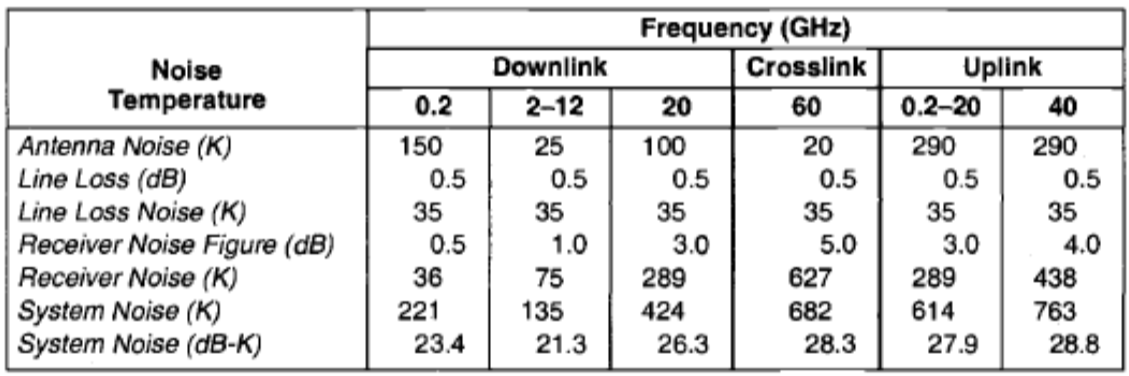

In [6]:
Image("vals.png", width=800)

### Link Budget Equation

We are interested in the ratio of signal energy to noise energy for each bit. We now have everything that we need in order to compute that. The signal energy per bit is given by $E_b$, and the noise energy is given by $N_0$. To get the ratio, we simply divide:

\begin{align}
\boxed{\frac{E_b}{N_0} = \frac{P_TG_TG_RL_aL_l\lambda^2}{\left(4\pi d\right)^2K_BT_{sys}R_b} } \longrightarrow \text{ signal to noise ratio per bit}
\end{align}

There are a couple more versions of this equation that it will be useful to have. Suppose that instead of the signal to noise ratio per bit, we wanted the signal to noise ratio over some bandwidth $B$ (measured in Hz). We can get that expression directly from the one above, by simply multiplying by $\frac{R_b}{B}$:

\begin{align}
\boxed{\frac{S}{N}= \frac{P_TG_TG_RL_aL_l\lambda^2}{\left(4\pi d\right)^2K_BT_{sys}B} } \longrightarrow \text{ signal to noise ratio per bandwidth}
\end{align}

It is often useful to represent the above equations in decibels.

\begin{align}
\boxed{\left[\frac{S}{N}\right]_{db} = [P_T]_{db} + [G_T]_{db} + [G_R]_{dB} + [L_a]_{dB} + [L_l]_{dB} + 10\text{log}_{10}\left[\left(\frac{\lambda}{4\pi R}\right)^{2}\right] - 10\log_{10}\left(K_BT_{sys}B\right)}
\end{align}

\begin{align}
\boxed{\left[\frac{E_b}{N_0}\right]_{db} = [P_T]_{db} + [G_T]_{db} + [G_R]_{dB} + [L_a]_{dB} + [L_l]_{dB} + 10\text{log}_{10}\left[\left(\frac{\lambda}{4\pi R}\right)^{2}\right] - 10\log_{10}\left(K_BT_{sys}R_b\right)}
\end{align}

And finally, we often see the $\frac{E_b}{N_0}$ expression defined in decibel form, using the particular set of variables defined below:

\begin{align}
P_TG_T&: \text{ Equivalent Isotropic Radiated Power (EIRP)}\\
\left(\frac{\lambda}{4\pi d}\right)^2 &: \text{ Free Space Loss ($L_s$)}\\
\frac{G_R}{T_{sys}}&: \text{ Receiver gain to noise temperature}
\end{align}

Rewriting the above expression in terms of these new variables:

\begin{align}
\frac{E_b}{N_0} = EIRP \cdot \frac{L_aL_lL_s}{K_BR_b} \cdot \frac{G_R}{T_{sys}}
\end{align}

In logarithmic form:

\begin{align}
\boxed{\left[\frac{E_b}{N_0}\right]_{dB} = \left[EIRP\right]_{dB} + \left[L_a\right]_{dB} + \left[L_l\right]_{dB} + \left[L_s\right]_{dB} + \left[\frac{G_R}{T_{sys}}\right]_{dB} - \left[K_B\right]_{dB} - \left[R_b\right]_{dB} }
\end{align}

## Modulations

In order to communicate information between satellite and ground station, we change some property of a *high-frequency carrier signal* $c(t)$ (amplitude, frequency, or phase) in a way that encodes the information in our message $m(t)$. This process is called modulation. Modulation is required because, if we were to transmit our information $m(t)$ directly, it would be at very low frequency (compared to the frequency of the carrier signals). These low frequency transmissions would require long antennas, and would be reflected off the ionosphere.

There are a variety of flavors of modulation.

### Analog Modulations

In analog modulation, the modulation is applied continuously in response to the analog information signal.

#### Amplitude modulation

As the name suggests, amplitude modulation encodes information in the amplitude of the carrier wave. A high-frequency signal is mixed with (multiplied by) a second, low-frequency wave that encodes the information.

\begin{align}
\text{Carrier}&: c(t) = A_c\cos{\left(\omega_c t\right)}\\
\text{Signal}&: m(t) \text{ with bandwidth $B$, typically, $B<<\omega_c$}\\
\text{AM Signal}&: s_{AM} = A_cm'(t) \cos{(\omega_c t)} \text{, where $m't(t) = 1+m(t)$}
\end{align}

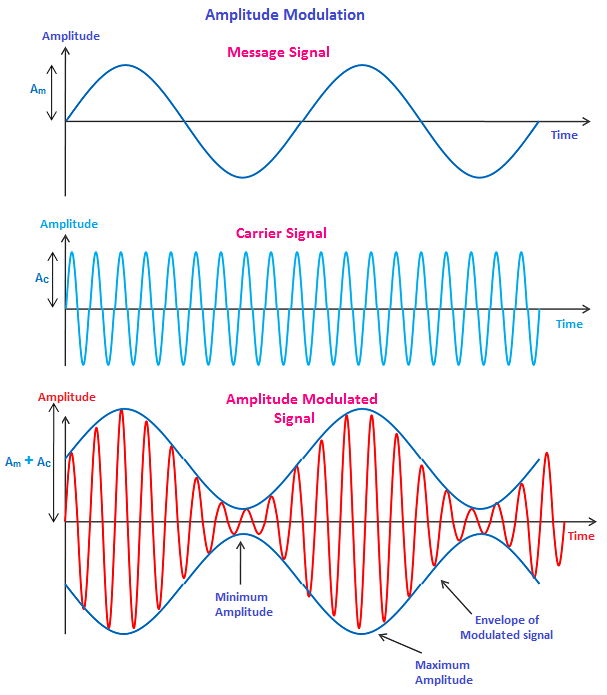

In [7]:
Image("am.png", width=400)

AM modulation requires a local oscillator to generate the high-frequency carrier, a mixer to multiply the two signals, and an amplifier. On the receiver side, demodulation requires another local oscillator to generate a proxy of the carrier signal, a mixer to multiply, a low-pass filter to keep only the low-frequency part of the received signal, and a diode to remove the DC offset.

#### Frequency modulation

In analog frequency modulation, such as FM radio broadcasting of an audio signal representing voice or music, the instantaneous frequency deviation, the difference between the frequency of the carrier and its center frequency, is proportional to the modulating signal.

![SegmentLocal](mods.gif "segment")

### Digital modulations

In digital modulation, we use a finite number of analog signals (pulses) to represent pieces of a digital message.

#### Amplitude shift keying

With binary amplitude shift keying (2-ASK), we encode a 0 as $A_0 \cos{\omega_ct}$ and a 1 as $A_1\cos{\omega_ct}$. However, we could have 4-ASK, 8-ASK, etc.

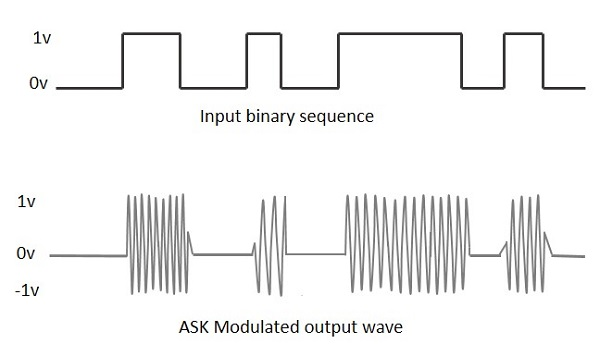

In [9]:
Image("ask.jpg", width=400)

#### Frequency shift keying

In FSK, different signals are transmitted as different frequencies. As with ASK, we can have 2FSK, 4FSK, etc. depending how many different frequencies we use to encode information.

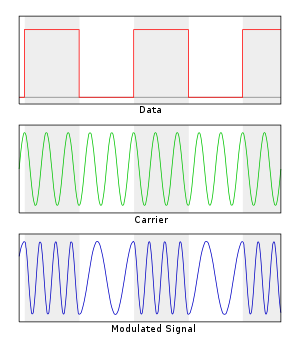

In [10]:
Image("fsk.png", width=400)

#### Phase shift keying

In PSK, symbols correspond to different phases, as shown below for binary phase shift keying (BPSK), quadrature phase shift keying (QPSK) and 8-PSK.

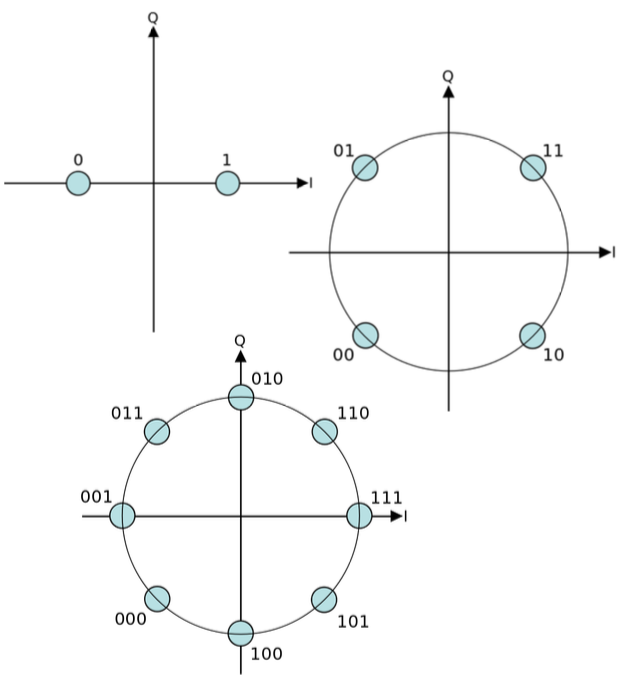

In [11]:
Image("psk.png", width=400)

### *An aside on demodulation for the Monarch chip-satellites*

The Monarch chipsats use a radio transciever that encodes information using GFSK. The receiver is an RTL-SDR software-defined radio which outputs raw I/Q data. This raw I/Q data is then demodulated into the bitstring.

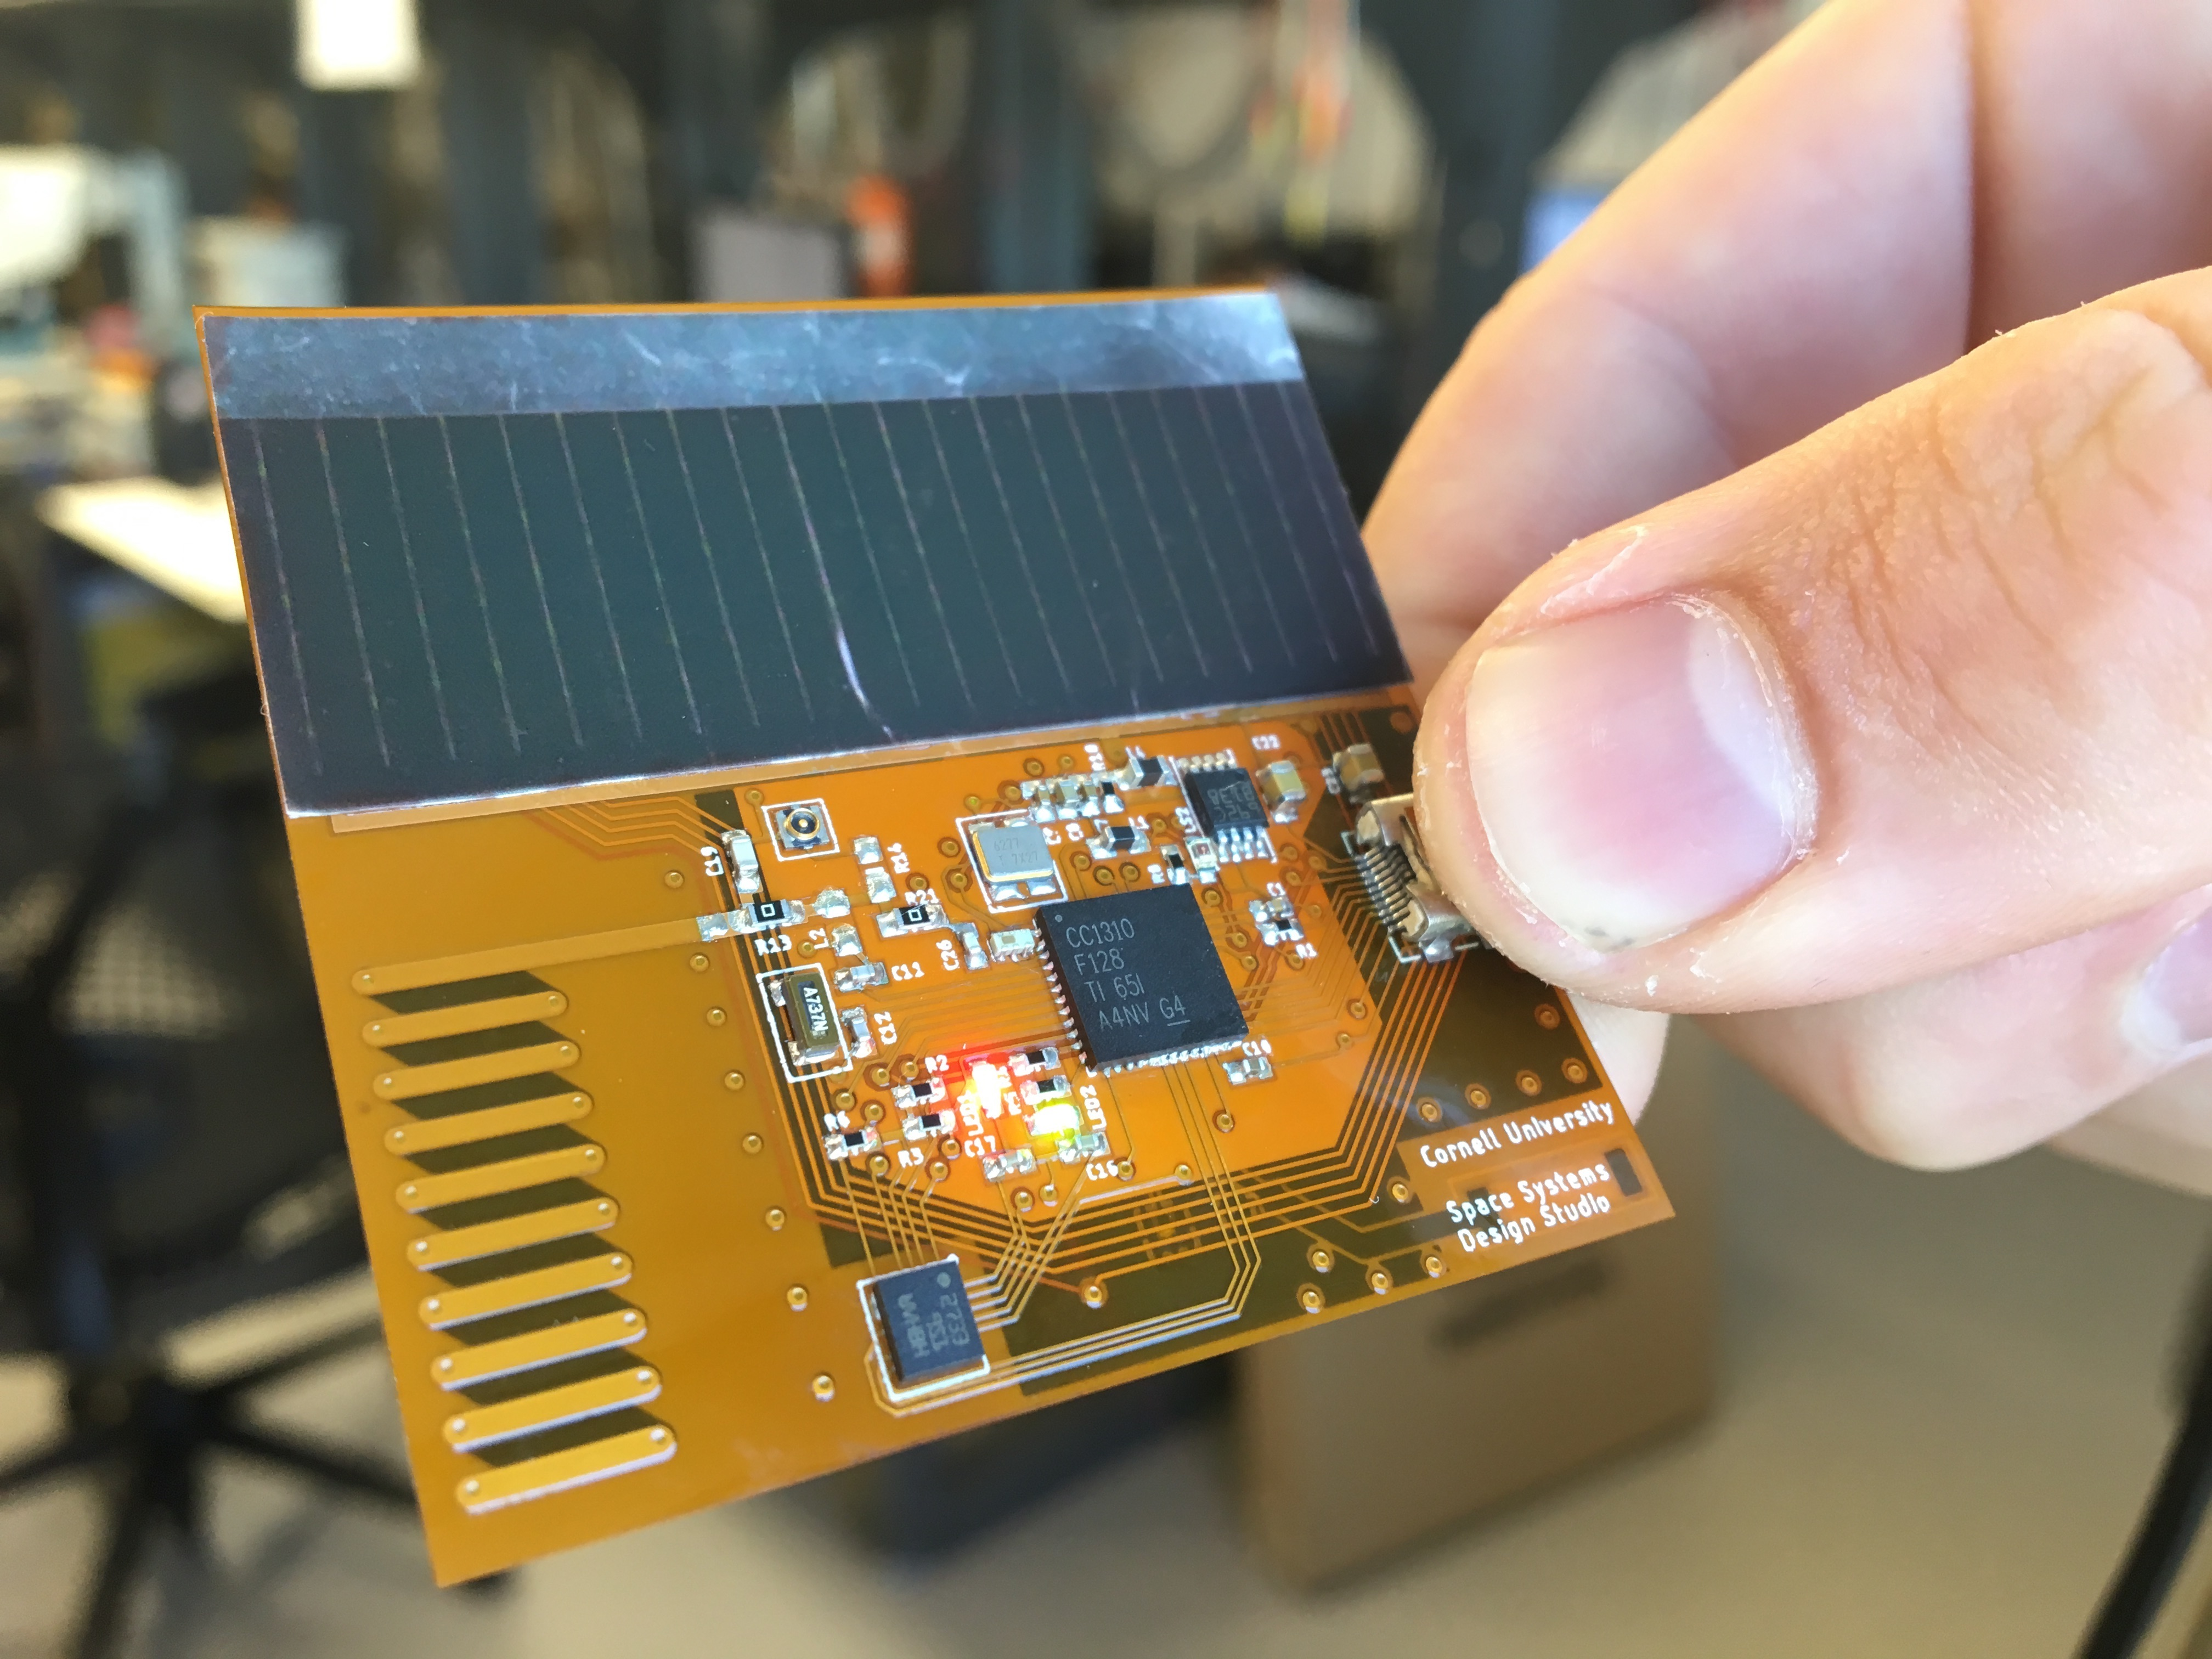

In [15]:
Image(filename = "Monarch.jpg", width=500, height=800)

The low-power transmitters (TI-CC1310's) use Gaussian Frequency Shift Keying (GFSK) to encode information at the carrier frequency. With GFSK, a logical 1 is encoded by increasing the frequency of the transmission to slightly greater than the carrier frequency and a logical zero is encoded by decreasing the frequency of the transmission to slightly less than the carrier frequency. This is in contrast to Amplitude Modulation which obviously modulates the amplitude in order to encode 1's and 0's, and Phase Modulation, which modulates the phase of the transmission (while keeping the frequency constant) in order to encode 1's and 0's. A good introductory article on these modulation schemes can be found here: https://www.allaboutcircuits.com/textbook/radio-frequency-analysis-design/radio-frequency-demodulation/quadrature-frequency-and-phase-demodulation/.

A discussion of the demodulation method requires a brief discussion of how the RTL-SDR sampling works. The RTL-SDR has two voltage-controlled oscillators that oscillate at precisely the carrier frequency of the transmitter (915 MHz). One of these oscillators is 90 degrees out of phase from the other. The RF transmissions received by the antenna are mixed with these local oscillators in order to get the baseband transmission. By mixing the received transmissions with both the in-phase oscillator and the out-of-phase oscillator, the RTL-SDR is able to represent the received transmission as the sum of two out-of-phase 915 MHz waves. One of these waves is in-phase (I) and the other is out-of-phase (or "quadrature", Q). This I/Q data is a nice way to represent the received transmissions because it is independent of the carrier frequency, and it includes phase information (which would be impossible to recover with just one local oscillator).

With the I/Q data, one has all of the information necessary to demodulate any of the modulation schemes mentioned above. For Amplitude Modulation, the relevant quantity would be the amplitude of the received transmission ($\sqrt{I^2 + Q^2}$). For phase modulation, the relevant quantity is the phase of the received signal relative to the local oscillators $\left(\text{atan2}\left(\frac{I}{Q}\right)\right)$. For Frequency Modulation, the information is encoded on the derivative of the phase. A procedural way to approximate this quantity is to find the conjugate product of the $n^{th}$ and $(n-1)^{st}$ samples (a complex number), and then to find the argument of the resulting complex number. If these two samples have the same phase, then the product will be a real number with argument 0. If these two samples are 90 degrees out of phase, then the product will be a purely imaginary number with argument $\frac{\pi}{2}$. The I/Q plot for a frequency-modulated signal ends up forming a circle, since the phase of the received transmission moves continually around the complex plane. For phase-modulated signals, the I/Q plots look like a collection of dots. Letting $\tilde{x}[n-1]$ be the complex conjugate of sample $x[n-1]$, this is represented by the below equation.

\begin{align}
y[n] = \text{arg}\left(x[n]\overline{x}[n-1]\right)
\end{align}

When no transmission is being received, the output of this demodulation method is white noise, since two consecutive samples may be any amount of phase separated from one another. During a transmission, however, this demodulation method is capable of recovering the logical waveform (the 1's and 0's) of the transmission. Below, the red trace is the output of the GFSK demodulation during a transmission. The logical 1's and 0's, clearly visible in the red trace, are represented by the blue binary-slicer below the red trace. In the upper-right corner, I have plotted the raw I and Q data (I on the horizontal, Q on the vertical). You can see that, during the transmission, this data forms a circle.

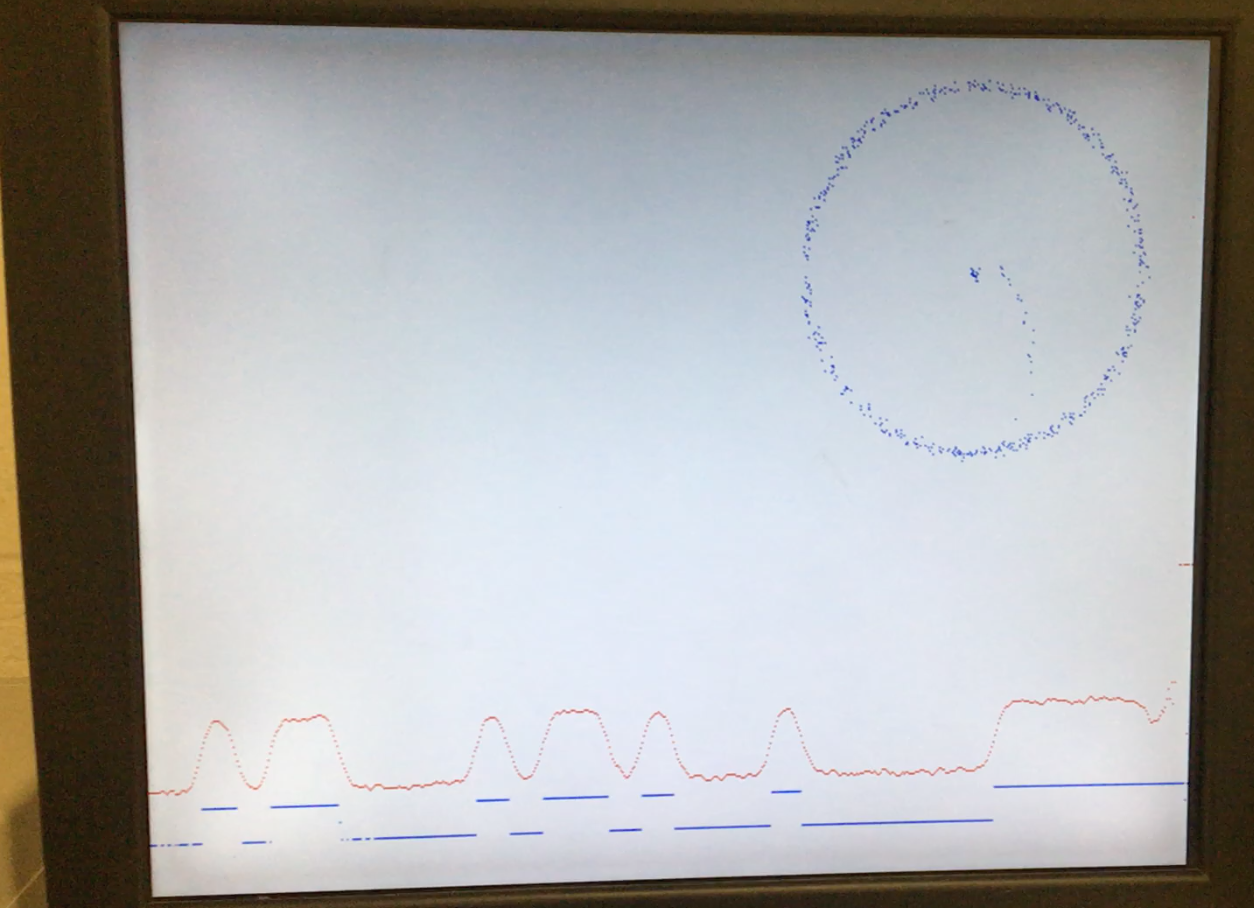

In [14]:
Image(filename = "iq.png", width=500, height=800)

## Calculating Bit Error Rate

The *bit error rate* is the probability that an error will be made in one bit when decoding a symbol, and is one of the main requirements of a communications system. While data rate tells you the *quantity* of the data in your channel, the bit error rate tells you the *quality* of the data in your channel. We typically see BER's on the order of $10^{-5}$. The BER depends on the signal to noise ratio, and on your choice of modulation.

#### BER for BPSK

Consider again BPSK. In BPSK, we encode 1's and 0's as two symbols that are 180 deg out of phase, as shown below.

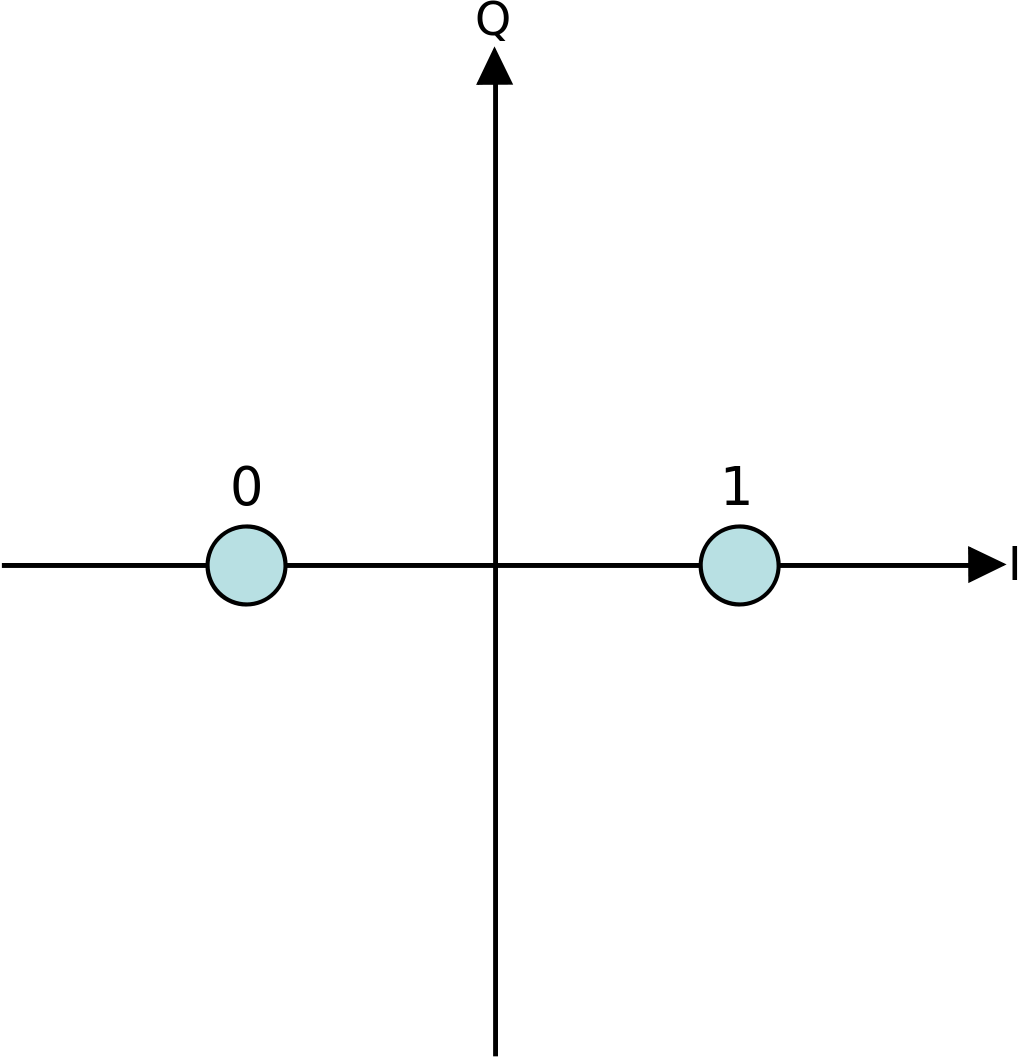

In [17]:
Image(filename = "bpsk.png", width=300, height=800)

In the absence of any noise whatsoever, our symbols for 1 and 0 would be a distance $\sqrt{I^2 + Q^2} = A$, the amplitude of the signal, from the origin, as represented below.

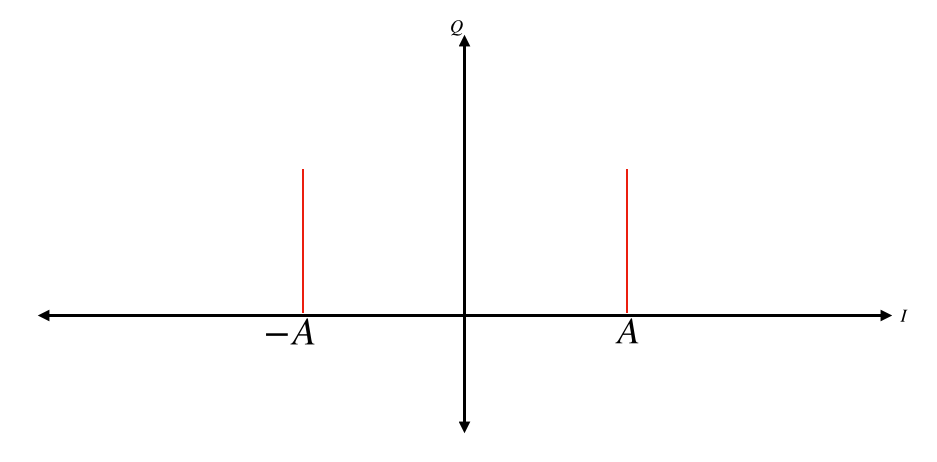

In [20]:
Image(filename = "nonoise.png", width=500, height=800)

But of course there is noise. We assume that there is additive Gaussian noise on top of our signal. So, instead of receiving perfectly distinct signals at $A$ and $-A$, we instead receive a perfectly distinct signal *plus* noise, as shown below:

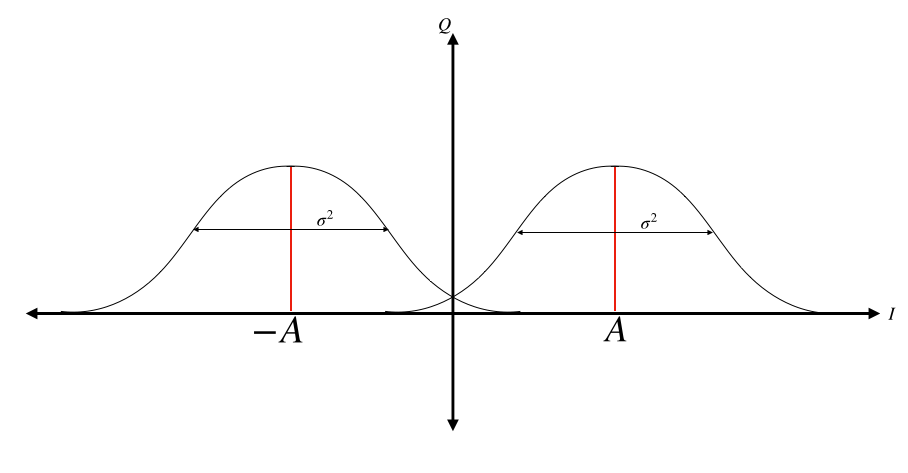

In [22]:
Image(filename = "noise.png", width=500, height=800)

*Note that these distributions overlap.* A Gaussian distribution is fully specified by its mean and its variance. We assume that each distribution is zero-mean, but what about its variance? Because the noise is zero-mean, its power is equal to its variance. So we can find the variance $\sigma^2$ as shown below:

\begin{align}
\sigma^2 &= \frac{P_R}{SNR} = \frac{N_0}{2}B
\end{align}

Let us assume a thresholding of 0. That is to say, a signal above 0 is considered a 1, and a signal below 0 is considered a -1. Let us furthermore assume that there is an equal probability of a 1 or a -1 being transmitted. The probability of a bit error is then given by:

\begin{align}
p(error) &= p\left(\text{transmit 0}\right)\cdot p\left(\text{receive 1 }|\text{ transmit 0}\right) + p\left(\text{transmit 1}\right)\cdot p\left(\text{receive 0 }|\text{ transmit 1}\right)\\
&= 0.5\cdot p\left(\mathcal{N}(-A,\sigma^2)>0\right) + 0.5 \cdot p\left(\mathcal{N}(A,\sigma^2)<0\right)\\
&= p\left(\mathcal{N}(-A,\sigma^2)>0\right)\\
&= \frac{1}{\sigma\sqrt{2\pi}} \int_0^{\infty}e^{-\frac{1}{2}\left(\frac{x+A}{\sigma}\right)^2}dx
\end{align}

Performing the substitution $t = \frac{x+A}{\sigma}$, we get:

\begin{align}
p(error) = \frac{1}{\sqrt{2\pi}} \int_{\frac{A}{\sigma}}^{\infty}e^{-\frac{1}{2}t^2}dt \equiv Q\left(\frac{A}{\sigma}\right)
\end{align}

This is the standard definition of a *Q-function.*

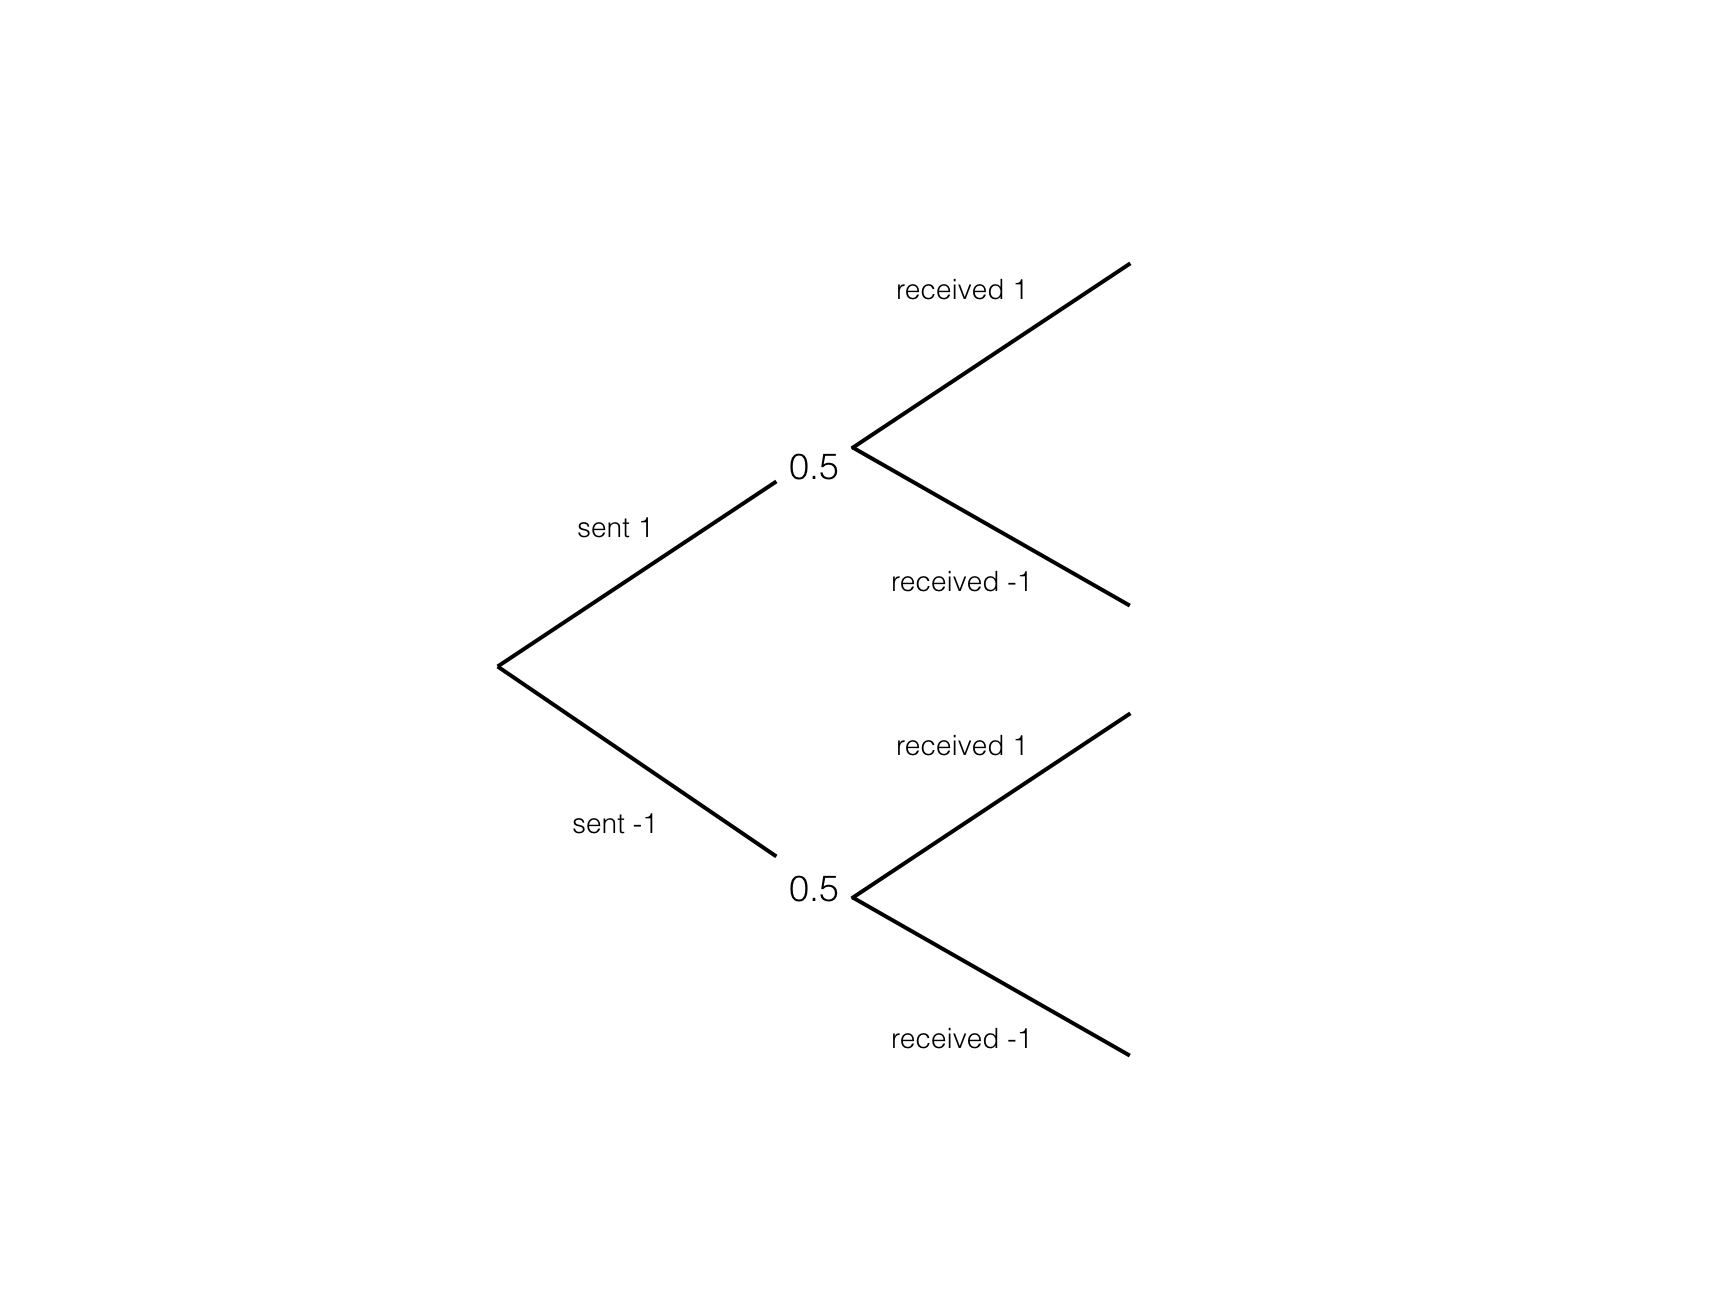

In [23]:
Image(filename = "tree.png", width=500, height=800)

More typically, we see the expression for the bit error rate written in terms of $\frac{E_b}{N_0}$.

\begin{align}
E_b &= A^2 T_b
\end{align}

where $T_b$ is the length of time associated with 1 bit. Similarly:

\begin{align}
\sigma^2 &= \frac{N_0}{2T_b}
\end{align}

So:

\begin{align}
\frac{E_b}{N_0} = \frac{A^2T_b}{N_0} = \frac{A^2T_b}{2\sigma^2T_b} = \frac{A^2}{2\sigma^2}
\end{align}

And we can rewrite the above expression for the BER as:

\begin{align}
\boxed{p(error) = Q\left(\sqrt{2\frac{E_b}{N_0}}\right)}
\end{align}

#### Other modulations

A similar technique can be used to calculate BER for other modulations. The results are:

\begin{align}
BER_{QPSK} &\approx Q\left(\sqrt{2\frac{E_b}{N_0}}\right)\\
BER_{8PSK} &\approx \frac{2}{3}Q\left(\sqrt{2\frac{E_b}{N_0}}\sin{\frac{\pi}{8}}\right)
\end{align}

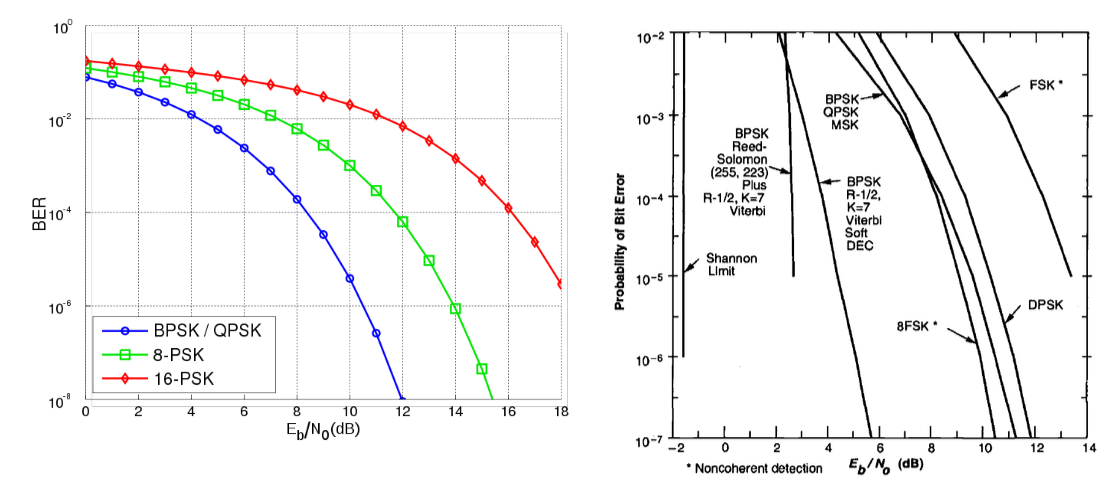

In [25]:
Image(filename = "plots.png", width=700, height=800)

#### Spectral efficiency

As you can see in the above plots, we get better BER for BPSK/QPSK than we do for 8PSK and other higher-order modulations. If BER were the only thing that we cared about, then we would never use these higher-order modulations. However, our choice of modulation also affects our datarate per unit bandwidth $\frac{R_b}{B}$. This ratio is called the **spectral efficiency** and it depends on the number of bits per symbol in the modulation ($M$), as well as the *roll-off factor* (sort of margin factor for the design of filters, typically $\alpha = 0.25$).

\begin{align}
\eta = \frac{R_b}{B} = \frac{\log_2{M}}{1 + \alpha}
\end{align}

As $M$ increases, cost and complexity of electronics also increase.

## The Shannon Limit

The noisy channel coding theorem states that for any given degree of noise contamination of a communication channel, discrete data can be communicated error-free up to a computable maximum rate through the channel. If we apply this to the case of continuous-time analog communications in the presence of Gaussian noise, we arrive at the Shannon-Hartley Theorem.

\begin{align}
R_b \leq C = B \text{log}_2\left(1 + \frac{S}{N}\right)
\end{align}

This theorem establishes the channel capacity for the communication link, which is a bound on the maximum amount of error-free information that can be transmitted per unit time with a specified bandwidth. It is assumed that the signal power is bounded, and that the Gaussian noise is characterized by a known power or power spectral density.

\begin{align}
R_b &= \text{data rate (bps)}\\
C &= \text{channel capacity (bits/second)}\\
B &= \text{bandwidth of the channel (Hz)}\\
S &= \text{average received signal power over the bandwidth (watts)}\\
N &= \text{average power of the noise and interference over the bandwidth (watts)}\\
\frac{S}{N} &= \text{signal to noise ratio}
\end{align}

If a bit rate of less than $C$ is used, there exists a coding technique (involving error correction) which allows the probability of error at the receiver to be made arbitrarily small. The theorem tells us nothing about what this coding technique is, however. Various types of coding techniques are discussed in the next section.

If we substitute $\eta = \frac{R_b}{B}$, and recall that $\frac{S}{N} = \frac{E_b}{N_0}\eta$, we can rewrite the Shannon limit as:

\begin{align}
\boxed{\frac{E_b}{N_0} \geq \frac{2^{\eta} - 1}{\eta}}
\end{align}

where:

\begin{align}
\eta = \frac{R_b\text{ (bps)}}{B\text{ (Hz)}}
\end{align}

## Coding techniques

###### There are courses on this topic. I am not treating it with the depth that it deserves.

Many digital communications systems will use both **source coding** and **channel coding**. The goal of source coding is data compression (decreases data rate by sending less bits). The goal of channel coding is error detection and correction (by increasing the data rate - send more bits so that you can catch errors).

### Source Coding

Source coding is the act of data compression, or the strategic conversion of lots of bits into fewer bits so that we don't need to transmit as many bits. Source coding techniques fall into two broad categories: *lossy* and *lossless*. 

Lossless compression allows for the perfect reconstruction of the original data from the compressed data. This sort of compression is used when it is important to maintain the integrity of the data. Examples include zip and png. These methods usually exploit the structure of the information. For example, **run length encoding** stores runs of data as a single value (count) rather than the original run, as shown below:

\begin{align}
\begin{bmatrix}1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0& 0 & 0 & 0 & 1 & 1\end{bmatrix} \longrightarrow \begin{bmatrix} 1 & 14 & 2\end{bmatrix}
\end{align}

This is useful, for example, with black and white images in which there may be large sections of black or white. **Huffman coding** exploits a different sort of pattern in the data. If there are some symbols which are more likely than others, we can use fewer bits to encode the more likely combinations. Assign 0 to the most likely symbol, the others start with 1. Then assign 10 to the next most likely symbol, the others start with 11. Etc. With these prefixes, there is no ambiguity about where one symbol ends and the next one starts. Suppose the following symbols:

\begin{align}
a1&: 0\\
a2&: 10\\
a3&: 110\\
a4&: 111
\end{align}

Can you rewrite the below transmission in terms of the above symbols?

\begin{align}
00101111001010110100
\end{align}

### Channel Coding

The key idea of channel coding is to strategically add *redundancy bits* in order to detect and correct errors.

**Detecting Errors**: Suppose that we added a *parity bit* at the end of every $N$ bits so that the sum of all the bits including the parity bit is always 0. Then we can detect one error:

\begin{align}
0101010\textbf{1} &\rightarrow \text{ OK, no errors. (or there could be 2 errors . . .)}\\
1110110\textbf{0} &\rightarrow \text{ NOK. There's an error (or 3 . . .), but where is it?}
\end{align}

**Correcting Errors**: Imagine that we simply transmit each bit 3 times. Then there are two possible symbols: 000 and 111. We say that the code has a **distance** of 3, because 3 bits need to change in order to change a valid symbol into another. This code can detect 2 errors and correct 1, assuming that 2 bit flips are much less likely than one bit flip:

\begin{align}
\text{Receive 100, 010, 001} \longrightarrow \text{Correct to 000 (much more likely than 111)}\\
\text{Receive 110, 101, 011} \longrightarrow \text{Correct to 111 (much more likely than 000)}
\end{align}

**Forward Error Correcting** codes embed the necessary information in the transmission to detect and correct errors. A particular FEC code is specified with the following properties:

\begin{align}
\text{Distance}&: \text{ Minimum number of bits needed to transform between two valid symbols}\\
&\text{Number of errors detected/corrected} \\
\text{Rate}&: \text{ Number of data bits/ Total number of bits $\rho = \frac{n-r}{n}$}\\
\text{Code Gain}&: \text{ Gain in dB in link budget equation for equal BER}
\end{align}

Error correcting codes come in two flavors: block codes and convolutional codes.

#### Hamming Codes

1. All Hamming codes have a distance 3. They can detect 2 errors and correct 1.
2. Hamming notation: ($2^{r} - 1, 2^r - r - 1$). E.g. Hamming (7,4) adds 3 bits of redundancy for every 4 bits of data, for a rate of 4/7.
3. Parity bits are added at positions 1,2,4,8,... The rest are data bits.

**How it works**: Consider four data bits $\begin{bmatrix}d1 & d2 & d3 & d4 \end{bmatrix}$. For a (7,4) Hamming, we add 3 parity bits to these data bits at the following locations: $\begin{bmatrix} \textbf{p1} & \textbf{p2} & d1 & \textbf{p3} & d2 & d3 & d4\end{bmatrix}$. We do so according to the following rules.

Consider the diagram below. We begin by filling in each of the data bits. Then, we fill in each parity bit such that the sum of all of the bits in each circle is 0.

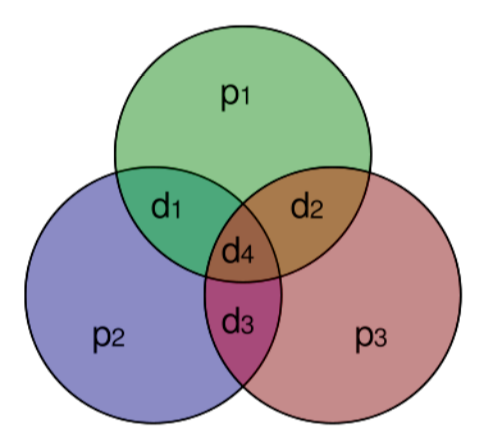

In [27]:
Image(filename = "venn.png", width=200, height=800)

If, for example, our data were $\begin{bmatrix} 1 & 0 & 1 & 1\end{bmatrix}$, then the graph would be filled in as shown below:

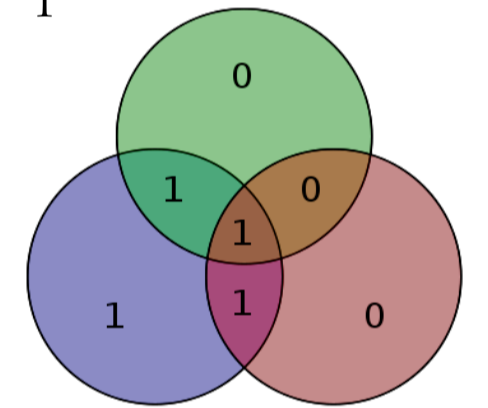

In [28]:
Image(filename = "venn2.png", width=200, height=800)

Note that the sum of all elements in the red circle is even, and that the same is true for the green and blue circles. So, our entire message, including parity bits, its $\begin{bmatrix}0&1&1&0&0&1&1\end{bmatrix}$.

Now, what if there is an error? Suppose, for example, that we receive a 1 for d2 rather than a 0. Then our diagram will look like that shown below:

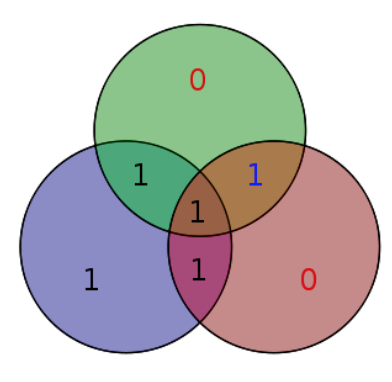

In [29]:
Image(filename = "err.png", width=200, height=800)

Which circles no longer sum to 0? What if d1 had been flipped rather than d2? Then which circles would no longer sum to 0? How about d4? How about p1? This provides a means of both identifying an error in the received message, and of correcting that error.

#### Reed-Solomon Codes

1. Works on symbols (usually 8-bit blocks) rather than bits.
2. Turns $k$ data symbols into $n > k$ symbols using **polynomials**.

**Encoding**: First, interpret the message $x=[x_1,x_2,\dots,x_k]$ as coefficients of a polynomial of degree $k-1$. $p_x(a) = \sum_{i=1}^k x_ka^{i-1}$. Then, evaluate the polynomial at $n$ different points. $C(x) = [p_x(a_1), p_x(a_2), \dots, p_x(a_n)]$.

**Decoding**: Based on regression (find the polynomial that goes through the $n$ points).

Reed-solomon codes have distance $n - (k-1)$. For example, Reed-Solomon (255,223) adds 32 redundant symbols every 223 data symbols. It can detect 32 errors and correct 16. These are used exhaustively in space.

## Antennas

An **antenna** is a circuit (wire, aperture) that interact with electromagnetic waves by transforming electromagnetic fields into currents and vice versa. There are various types of antennas, including *wire antennas* (dipoles), *apertures* (parabolic, patch), and others (like Yagi). An omnidirectional antenna radiates with equal power in all directions, but most antennas are directional.

An omnidirectional antenna has gain G=1 (0 dB). For a ***parabolic antenna***:

\begin{align}
G = \eta\left(\frac{\pi D}{\lambda}\right)^2
\end{align}

where $\eta$ is not the same as above, and has a value typically in the range 0.55-0.6. Different types of antenna have different expressions for this gain.

EIRP ($P_TG_T$) is the primary design parameter on the transmitter side. There is a trade-off between transmit power and antenna size. We can compensate a small antenna with lots of power, and vice-versa. Where you want to be in that trade depends on your constraints (cost, volume, etc.).